In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
data_dir = '/data1/wgs_APA/MAAPER_out'
genes_dirs = os.listdir(data_dir)

genes_pas = {}
for gene in genes_dirs:
    try:
        gene_name = gene.split('_')[0]
        gene_pas = pd.read_csv(data_dir + "/" + gene + '/gene.txt' ,sep='\t', index_col=0)
        genes_pas[gene_name] = gene_pas
    except:
        continue
    
shapes = []
for pgene in genes_pas:
    print(pgene)
    shapes.append(genes_pas[pgene].shape)

# for each gene in genes_pas, lets filter the genes_pas['gene'] to only keep rows with npas > 1

genes_pas_filtered = {}
for gene in genes_pas:
    genes_pas_filtered[gene] = genes_pas[gene][genes_pas[gene]['npas'] > 1]


CD8B
ZNF589
BYSL
IP6K2
EBF2
MEIS2
BUD23
NOS1AP
MYF6
TARBP2
SPECC1
RBM6
TRAPPC1
SF3B2
RPS6KA1
LARP1
PRKCB
COA4
METTL9
CMIP
NR2C1
PTTG1IP
ITPR3
PXMP4
ZNF544
VPS8
TRIM58
ZCCHC8
MAST4
PTOV1
FKBP15
DHRSX
ARL5A
ZER1
NMD3
NUDT4
RPIA
THUMPD1
PTPN23
NCAPH2
ZNF613
TMEM192
PCGF3
PRG2
MPLKIP
RRP8
TMEM243
LIN9
JUNB
SFMBT1
CHMP5
SNX11
LIN28B
UFL1
SLC25A25
RFX2
EIF4A2
FGD6
PSMA4
FBXO8
TOLLIP
NECAP2
APH1A
E2F8
MON1B
ZFP42
TRIM38
OR1D2
ARL6IP1
UBXN2B
THEM4
LYPLAL1
PMM2
FBXO21
SAV1
PTPN12
CUL4B
TMEM164
TRERF1
CRYZL1
TJP2
R3HDM1
USP14
SEPTIN6
KIAA0355
IVNS1ABP
GABARAPL2
ZNF131
P4HA2
GATA4
CLK3
SPRED1
MPC1
TMCO3
MBOAT2
ZBTB11
EHD1
GBE1
SFT2D1
ZC3H7A
PTPRG
CTXN1
PDHX
KRCC1
DEDD
PAQR3
LARP4B
INTS13
MCM8
PLXND1
ARV1
CTDP1
BHLHE41
GULP1
INO80B
TMEM80
FBXW7
SLC6A8
SLC39A6
ZDHHC20
TOP1
KLF14
WDFY2
SON
BRD1
GRTP1
NKX3-2
ETV6
ZFP69B
NPRL2
NADK2
TRIP6
MRM2
METTL5
SARS2
POLR3GL
GNL1
CCDC169-SOHLH2
KDM8
CYP3A5
UBN1
ATP7A
KDELR3
NR1H3
C6orf15
CRK
TTC13
ZNF35
MAFF
ZNF517
KIF1B
NAGA
SDCBP
TMBIM4
SSNA1
LGMN
CNTRL
PASD1


In [3]:
genes_pas_filtered['HNRNPA1L2']

npas     pval   RLDu    RLDi    REDu     REDu.pval    REDi  \
gene                                                                 
ALDOA      2  0.06570  0.238     NaN   7.510  2.300000e-02     NaN   
ANP32B     4  0.01880  0.312    2.45   1.860  1.480000e-04    3.84   
APRT       2  0.10900  0.164     NaN   6.870  1.710000e-01     NaN   
ARGLU1     4  0.02960  1.180    2.52  27.000  4.720000e-01    1.61   
ARPC3      2  0.00227  1.580     NaN   7.110  1.240000e-11     NaN   
...      ...      ...    ...     ...     ...           ...     ...   
UBE2L3     3  0.63000  0.158     NaN   0.609  1.370000e-01     NaN   
UBL5       3  0.33300    NaN -233.00     NaN           NaN -233.00   
UQCR11     3  0.80300 -0.440     NaN  -1.270  1.000000e+00     NaN   
YBX1       4  1.00000  0.333    1.28   3.270  7.350000e-20    4.00   
YWHAB      7  0.00114 -1.040   -2.27  -6.920  1.000000e+00   -9.75   

           REDi.pval  nread.c1.1  nread.c2.1  
gene                                          
ALDOA            NaN        7187          37  
ANP32B  2.460000e-06        6684          59  
APRT             NaN        3206          34  
ARGLU1  2.200000e-02        1126          20  
ARPC3            NaN        3025          25  
...              ...         ...         ...  
UBE2L3           NaN        6496          69  
UBL5    1.000000e+00        2863          21  
UQCR11           NaN        3723          31  
YBX1    5.650000e-20       22134         190  
YWHAB   5.860000e-02        2379          23  

[205 rows x 10 columns]

In [58]:
affected_genes_APA = {}
for gene in genes_pas_filtered:
    for apa in genes_pas_filtered[gene].index:
        if genes_pas_filtered[gene]['REDu.pval'][apa] < 0.05:
            if apa not in affected_genes_APA:
                affected_genes_APA[apa] = {}
                affected_genes_APA[apa][gene] = genes_pas_filtered[gene]['REDu'][apa]
            else:
                affected_genes_APA[apa][gene] = genes_pas_filtered[gene]['REDu'][apa]

In [59]:
affecte_genes_APA_df = pd.DataFrame.from_dict(affected_genes_APA, orient='index')
# nan to zero
affecte_genes_APA_df = affecte_genes_APA_df.fillna(0)
affecte_genes_APA_df = affecte_genes_APA_df.replace([np.inf, -np.inf], 0)
affecte_genes_APA_df


CD8B  MEIS2  BUD23  NOS1AP  SPECC1  TRAPPC1  SF3B2  RPS6KA1  \
ANP32B    -2.45    5.7    5.3    4.70    1.42     1.95  -3.26   -0.795   
BLVRB     -3.56    0.0    0.0    0.00    0.00    -2.08   0.00    0.000   
BTF3       2.65   85.5   53.5    2.35    0.74    -4.15  -5.14    5.920   
CANX     112.00    0.0    0.0    0.00   -1.75     0.00  -5.71    0.000   
EEF1G     -4.07   12.9   12.9    0.00    0.00     0.00   0.00   13.000   
...         ...    ...    ...     ...     ...      ...    ...      ...   
PAIP1      0.00    0.0    0.0    0.00    0.00     0.00   0.00    0.000   
ATAD3A     0.00    0.0    0.0    0.00    0.00     0.00   0.00    0.000   
AMOTL1     0.00    0.0    0.0    0.00    0.00     0.00   0.00    0.000   
CTSC       0.00    0.0    0.0    0.00    0.00     0.00   0.00    0.000   
TMEM158    0.00    0.0    0.0    0.00    0.00     0.00   0.00    0.000   

           COA4  NR2C1  ...  ACBD6  NDUFS2  RRAGA  HES4  DMAC2  PRDM16  \
ANP32B     4.97   1.60  ...    0.0     0.0    0.0   0.0    0.0     0.0   
BLVRB      0.00   0.00  ...    0.0     0.0    0.0   0.0    0.0     0.0   
BTF3     265.00  -2.87  ...    0.0     0.0    0.0   0.0    0.0     0.0   
CANX      -4.18   0.00  ...    0.0     0.0    0.0   0.0    0.0     0.0   
EEF1G     42.90   0.00  ...    0.0     0.0    0.0   0.0    0.0     0.0   
...         ...    ...  ...    ...     ...    ...   ...    ...     ...   
PAIP1      0.00   0.00  ...    0.0     0.0    0.0   0.0    0.0     0.0   
ATAD3A     0.00   0.00  ...    0.0     0.0    0.0   0.0    0.0     0.0   
AMOTL1     0.00   0.00  ...    0.0     0.0    0.0   0.0    0.0     0.0   
CTSC       0.00   0.00  ...    0.0     0.0    0.0   0.0    0.0     0.0   
TMEM158    0.00   0.00  ...    0.0     0.0    0.0   0.0    0.0     0.0   

         COX7A2  TNFAIP8  GCHFR  PIK3CB  
ANP32B      0.0      0.0    0.0     0.0  
BLVRB       0.0      0.0    0.0     0.0  
BTF3        0.0      0.0    0.0     0.0  
CANX        0.0      0.0    0.0     0.0  
EEF1G       0.0      0.0    0.0     0.0  
...         ...      ...    ...     ...  
PAIP1       0.0      0.0    0.0     0.0  
ATAD3A      0.0      0.0    0.0     0.0  
AMOTL1      0.0      0.0    0.0     0.0  
CTSC        0.0      0.0    0.0     0.0  
TMEM158     0.0      0.0    0.0     0.0  

[2761 rows x 7650 columns]

In [60]:
(affecte_genes_APA_df==1).all(axis=1).sum()

0

In [50]:
# for all the genes lets get the median of signficant genes for REDu, signficant genes are thoese with REDu.pval < 0.05
# do this only for genes with more than 50 signficant genes
genes_apa_effect = {}
affected_genes_num = {}
for gene in genes_pas_filtered:
    if genes_pas_filtered[gene][genes_pas_filtered[gene]['REDu.pval'] < 0.05].shape[0] > 100:
        genes_apa_effect[gene] = genes_pas_filtered[gene][genes_pas_filtered[gene]['REDu.pval'] < 0.05]['REDu'].mean()

genes_apa_effect_df = pd.DataFrame.from_dict(genes_apa_effect, orient='index')
genes_apa_effect_df.columns = ['apa_effect']

In [64]:
genes_apa_effect_df

apa_effect
SPECC1      -3.416269
RBM6         2.073477
RPS6KA1      5.813447
PXMP4       -2.672672
R3HDM1       1.463409
...               ...
HIST2H4A    -6.324642
GABARAPL1    5.393028
RERE         5.814902
EPB41L2     -2.087857
PSMB5        1.663894

[725 rows x 1 columns]

In [65]:
# delete the rows with inf values
genes_apa_effect_df = genes_apa_effect_df.replace([np.inf, -np.inf], np.nan)
genes_apa_effect_df = genes_apa_effect_df.dropna()

In [67]:
genes_apa_effect_df['genes'] = genes_apa_effect_df.index
genes_apa_effect_df

apa_effect      genes
SPECC1      -3.416269     SPECC1
RBM6         2.073477       RBM6
RPS6KA1      5.813447    RPS6KA1
PXMP4       -2.672672      PXMP4
R3HDM1       1.463409     R3HDM1
...               ...        ...
HIST2H4A    -6.324642   HIST2H4A
GABARAPL1    5.393028  GABARAPL1
RERE         5.814902       RERE
EPB41L2     -2.087857    EPB41L2
PSMB5        1.663894      PSMB5

[725 rows x 2 columns]

In [68]:
genes_apa_effect_df.genes.to_csv('genes_sig_names.txt', index=False)

In [69]:
genes_apa_effect_df.to_csv('genes_apa_effect_df.csv')

/home/aiden/anaconda3/envs/for_DL/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


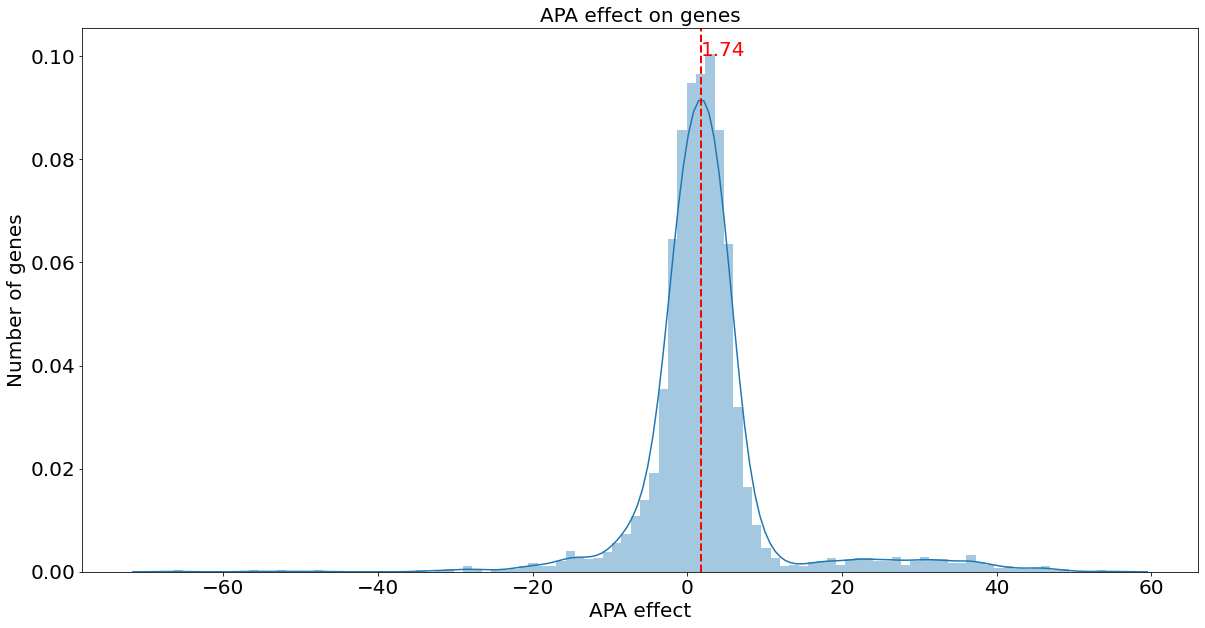

In [19]:
# plot the histogram of genes_apa_effect_df
# label the genes on top of each bar
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

plt.figure(figsize=(20,10))
sns.distplot(genes_apa_effect_df['apa_effect'], bins=100)
plt.xlabel('APA effect', fontsize=20)
plt.ylabel('Number of genes', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('APA effect on genes', fontsize=20)
# should the median with a line
plt.axvline(genes_apa_effect_df['apa_effect'].median(), color='r', linestyle='dashed', linewidth=2)
# add the median value to the plot right next to the line
plt.text(genes_apa_effect_df['apa_effect'].median() + 0.01, 0.1, str(round(genes_apa_effect_df['apa_effect'].median(), 2)), fontsize=20, color='r')
plt.show()

In [20]:
# extremes of genes_apa_effect_df

extremes = genes_apa_effect_df[abs(genes_apa_effect_df['apa_effect']) > 2]
extremes

apa_effect
EBF2         9.278494
MEIS2       23.204789
BUD23       13.965088
SPECC1      -3.416269
RBM6         2.073477
...               ...
DNAJC4      -2.195850
TNFRSF12A   -7.429786
EPB41L2     -2.087857
ZNF519      40.614118
ZNF77        6.496275

[1977 rows x 1 columns]

In [21]:
# cluster genes_apa_effect_df
# cluster genes based on their APA effect 

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = genes_apa_effect_df.values
X = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
genes_apa_effect_df['cluster'] = kmeans.labels_

In [22]:
genes_apa_effect_df

apa_effect  cluster
EBF2        9.278494        1
MEIS2      23.204789        0
BUD23      13.965088        1
SPECC1     -3.416269        1
RBM6        2.073477        1
...              ...      ...
POGLUT1    -0.603086        1
OR7A17     -0.213881        1
PRKRIP1     1.431963        1
PRICKLE3    1.306032        1
ZNF77       6.496275        1

[3082 rows x 2 columns]

In [28]:
genes_apa_effect_df['genes'] = genes_apa_effect_df.index

In [29]:
# save the index of genes_apa_effect_df in a text file
genes_apa_effect_df.genes.to_csv('genes_apa_effect_df.txt', index=False)


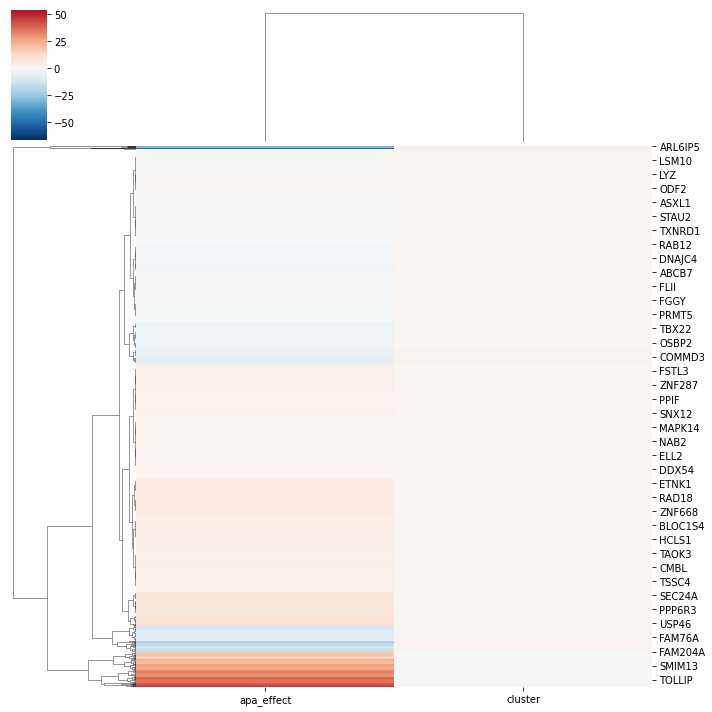

In [23]:
sns.clustermap(genes_apa_effect_df, cmap='RdBu_r', center=0)

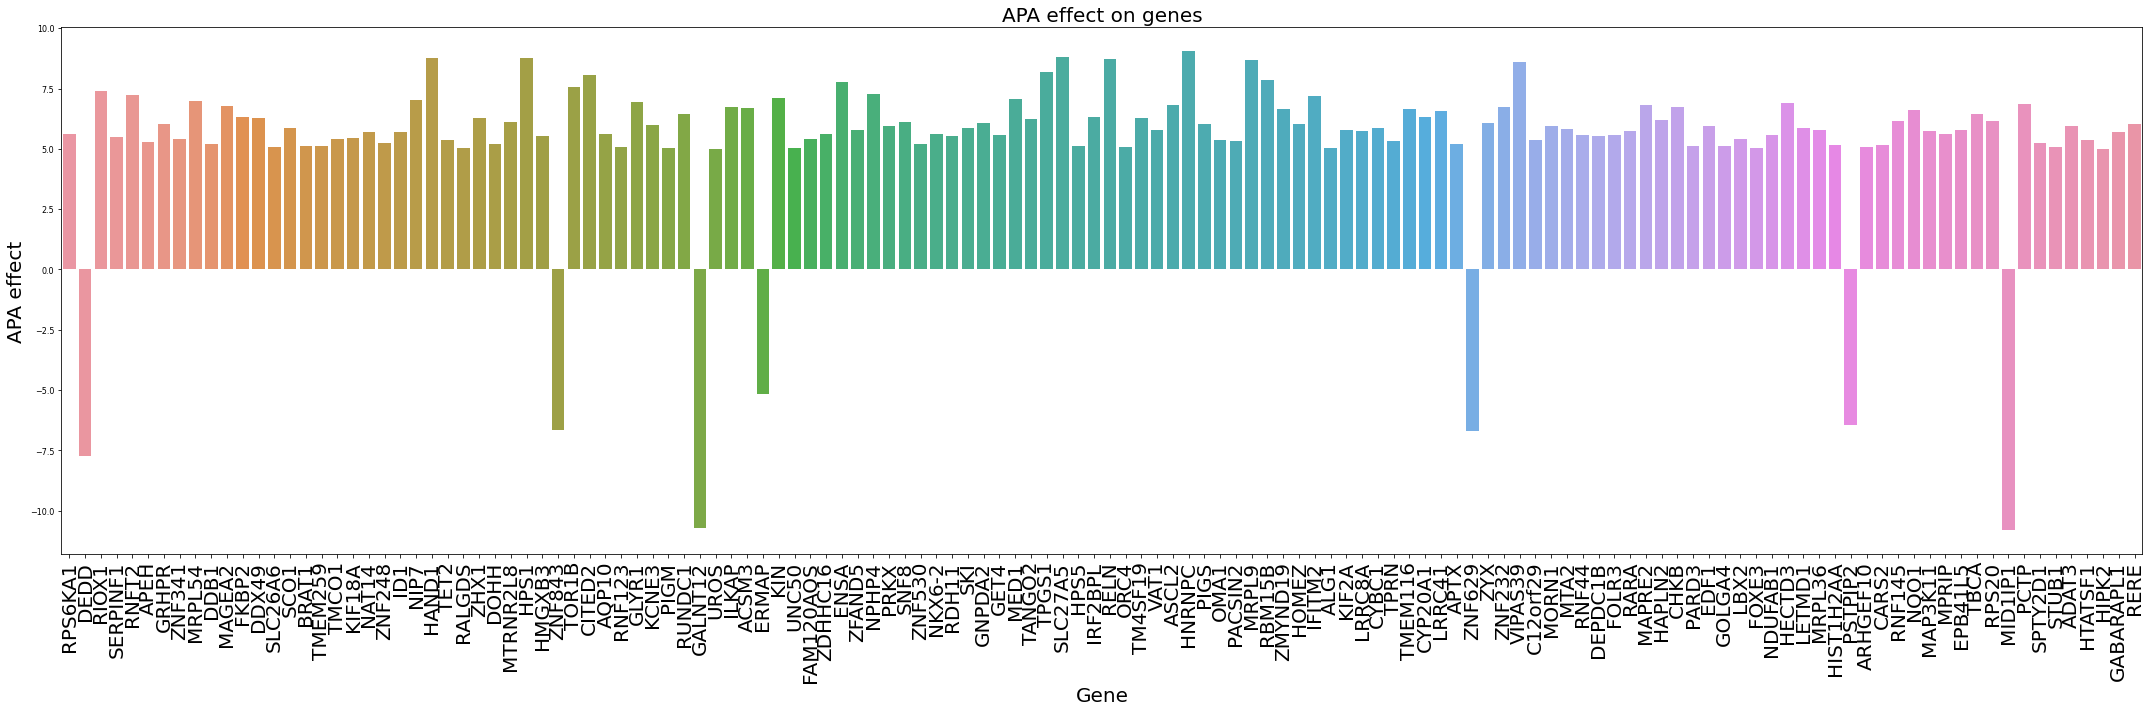

In [23]:
#plot extremes, each gene is a bar
plt.figure(figsize=(40,10))
sns.barplot(x=extremes.index, y=extremes['apa_effect'])
plt.xlabel('Gene', fontsize=20)
plt.ylabel('APA effect', fontsize=20)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=8)
plt.title('APA effect on genes', fontsize=20)
plt.tight_layout()
plt.show()

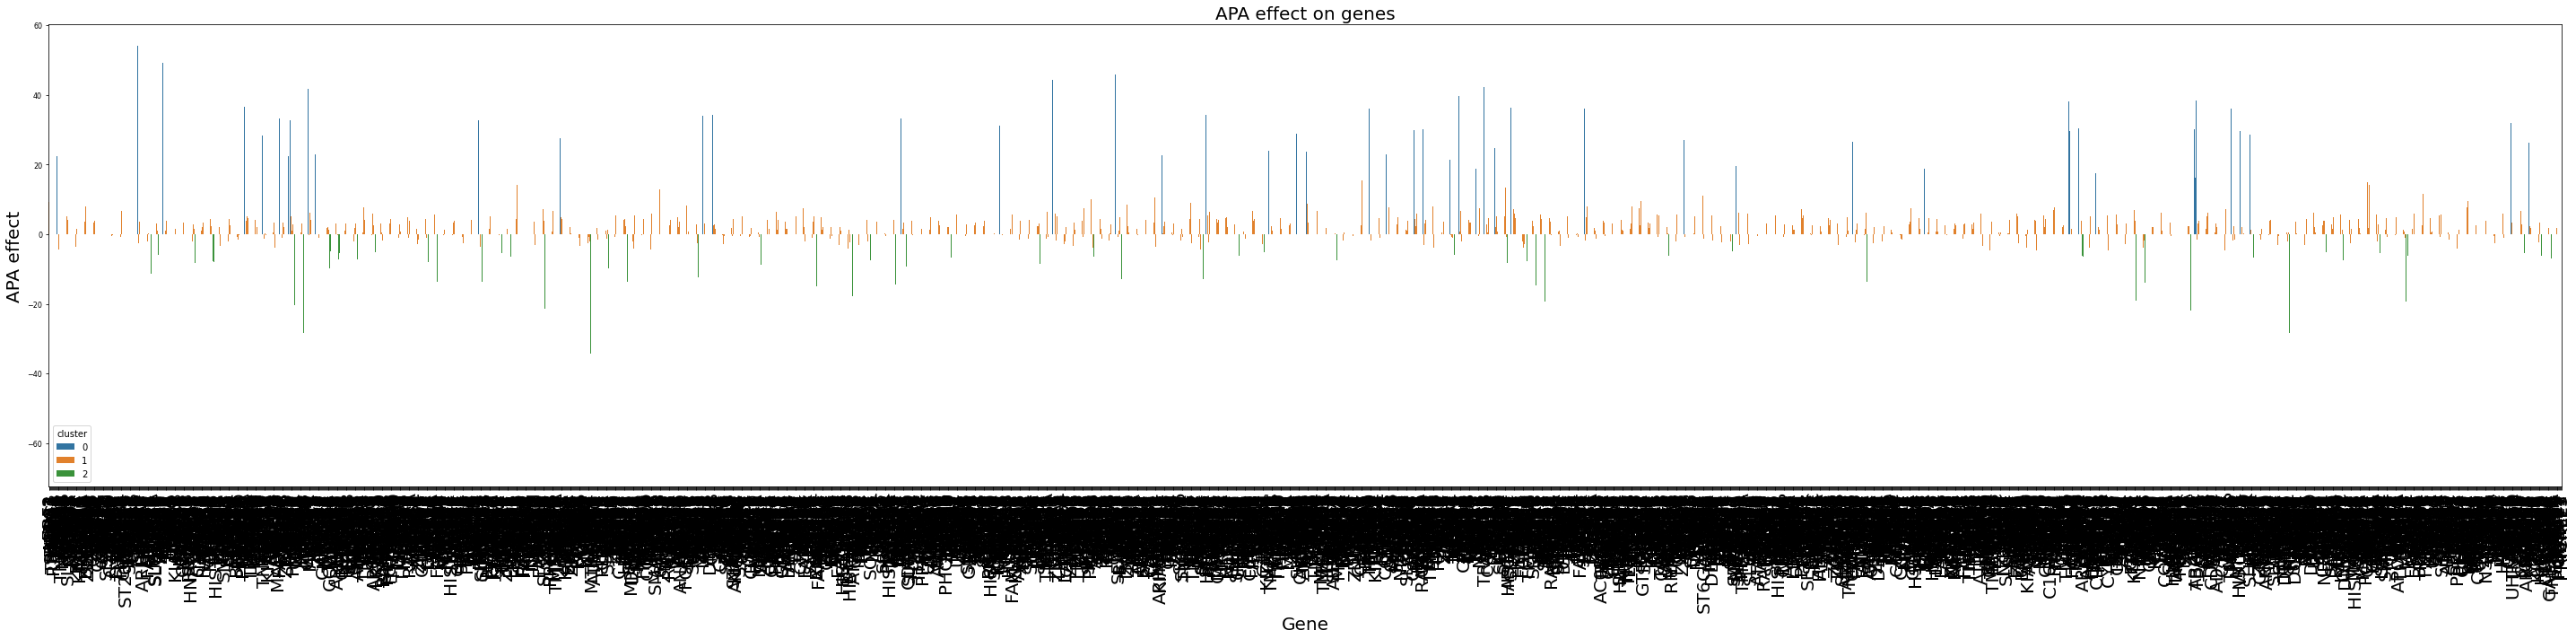

In [24]:
# ;ets make a barplot and and color the bars based on the cluster
plt.figure(figsize=(40,10))
sns.barplot(x=genes_apa_effect_df.index, y=genes_apa_effect_df['apa_effect'], hue=genes_apa_effect_df['cluster'])
plt.xlabel('Gene', fontsize=20)
plt.ylabel('APA effect', fontsize=20)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=8)
plt.title('APA effect on genes', fontsize=20)
plt.tight_layout()
plt.show()


In [ ]:
# load in the RBPs 
rbps = pd.read_csv('rbps.txt', sep='\t', index_col=0)

In [4]:
# read in the genes_GP_apa_df
import pandas as pd
genes_GP_apa_df = pd.read_csv('genes_GP_apa_df.csv', index_col=0)
genes_GP_apa_df.head()

term_name    genes  APA_effect
1  nuclear lumen   SPECC1   -3.416269
2  nuclear lumen  RPS6KA1    5.813447
3  nuclear lumen     CLK3    2.457411
4  nuclear lumen     DEDD  -13.204945
5  nuclear lumen   INTS13    1.644397

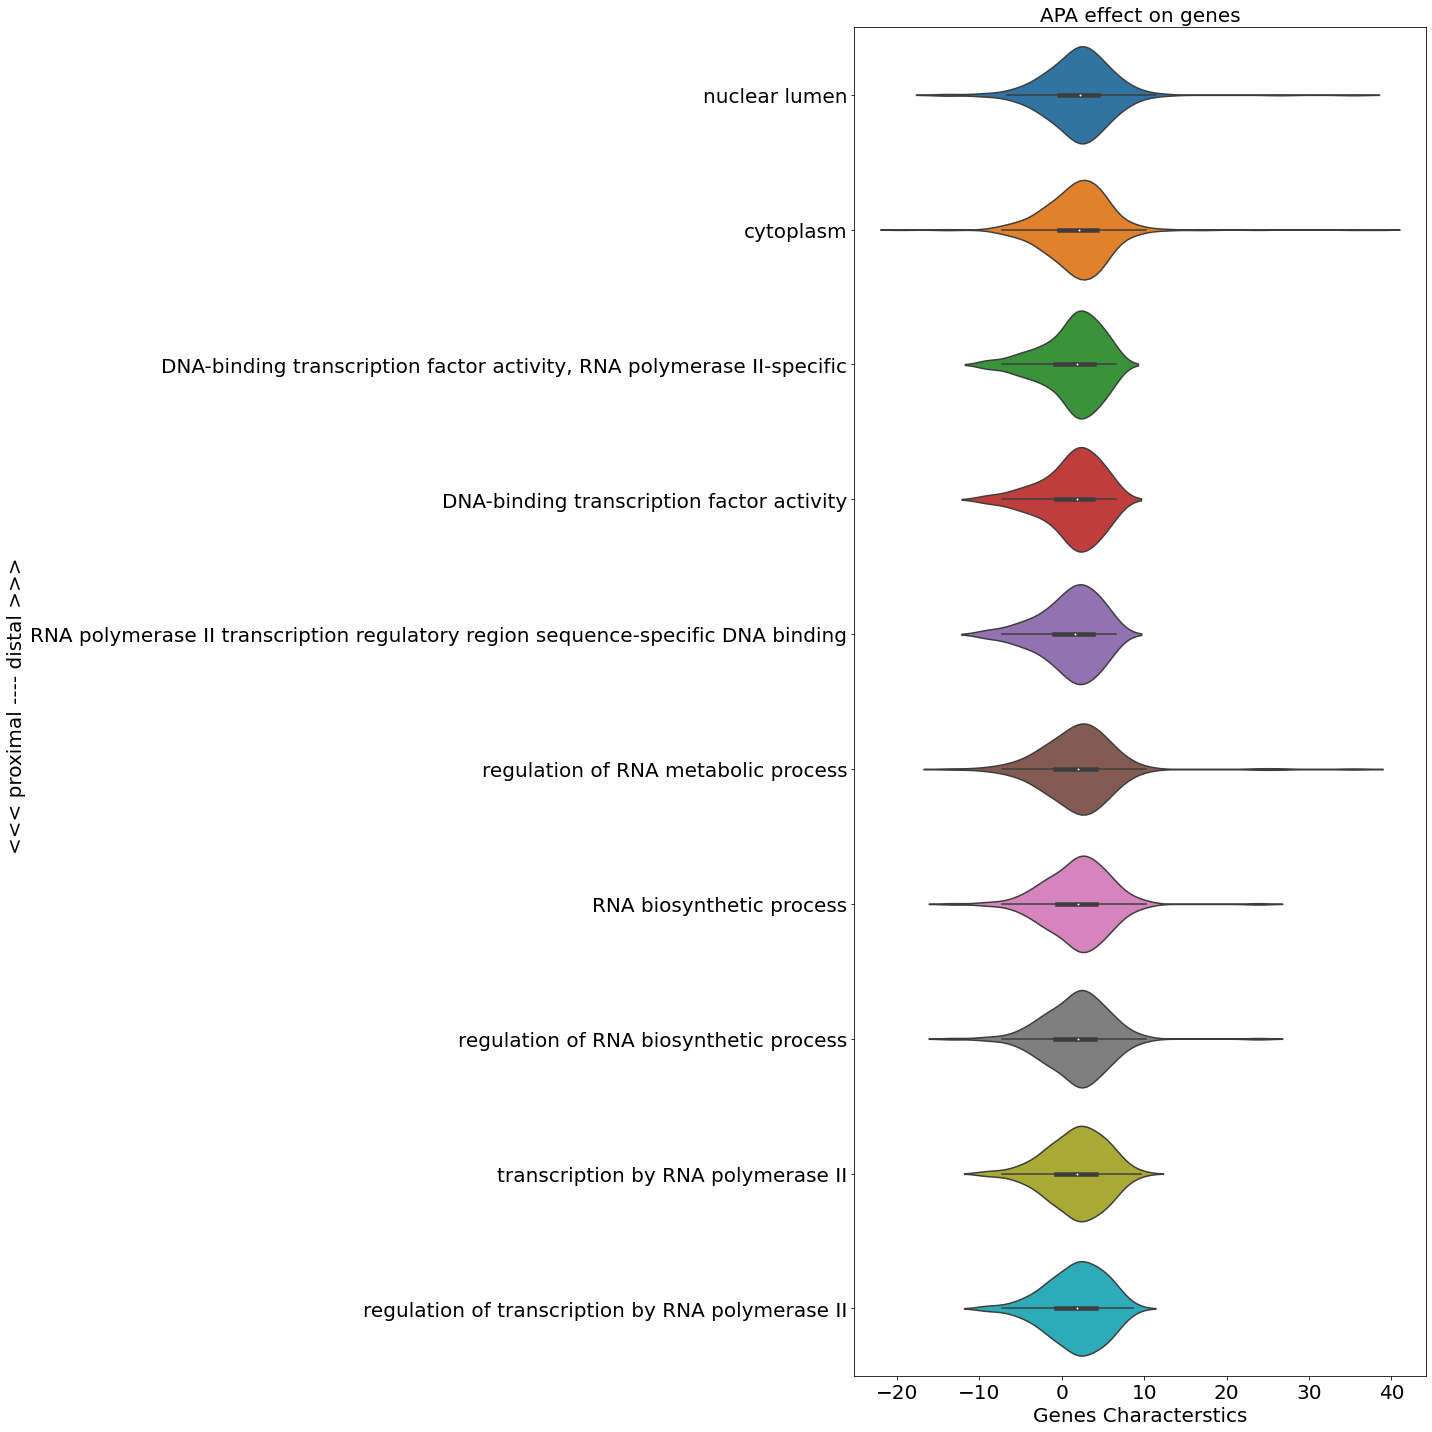

In [78]:
# lets plot  violin plots genes_GP_apa_df and colur by Info column
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,20))
sns.violinplot(x=genes_GP_apa_df['APA_effect'], y=genes_GP_apa_df['term_name'], orient='h')
plt.xlabel('Genes Characterstics', fontsize=20)
plt.ylabel('<<< proximal ---- distal >>> ', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('APA effect on genes', fontsize=20)
plt.tight_layout()
# x axis labels are overlapping, lets rotate them
# plt.xticks(rotation=45)
plt.show()


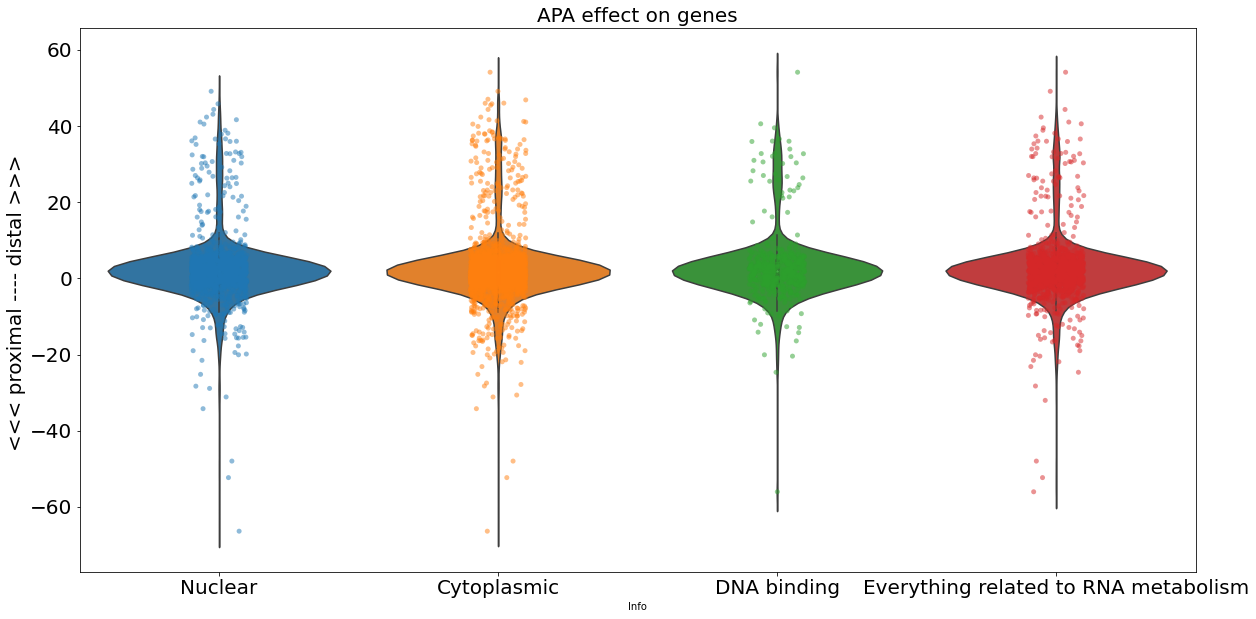

In [21]:
# lets plot  violin plots genes_GP_apa_df and colur by Info column
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
# in the violin plot show the outliers
sns.violinplot(x=genes_GP_apa_df['Info'], y=genes_GP_apa_df['APA_effect'], showfliers=True)
# sns.stripplot(x=genes_GP_apa_df['Info'], y=genes_GP_apa_df['APA_effect'], jitter=True, size=10)
# for stripplot only show the points that are outliers
sns.stripplot(x=genes_GP_apa_df['Info'], y=genes_GP_apa_df['APA_effect'], jitter=True, size=5, alpha=0.5)
plt.ylabel('<<< proximal ---- distal >>> ', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('APA effect on genes', fontsize=20)
plt.show()


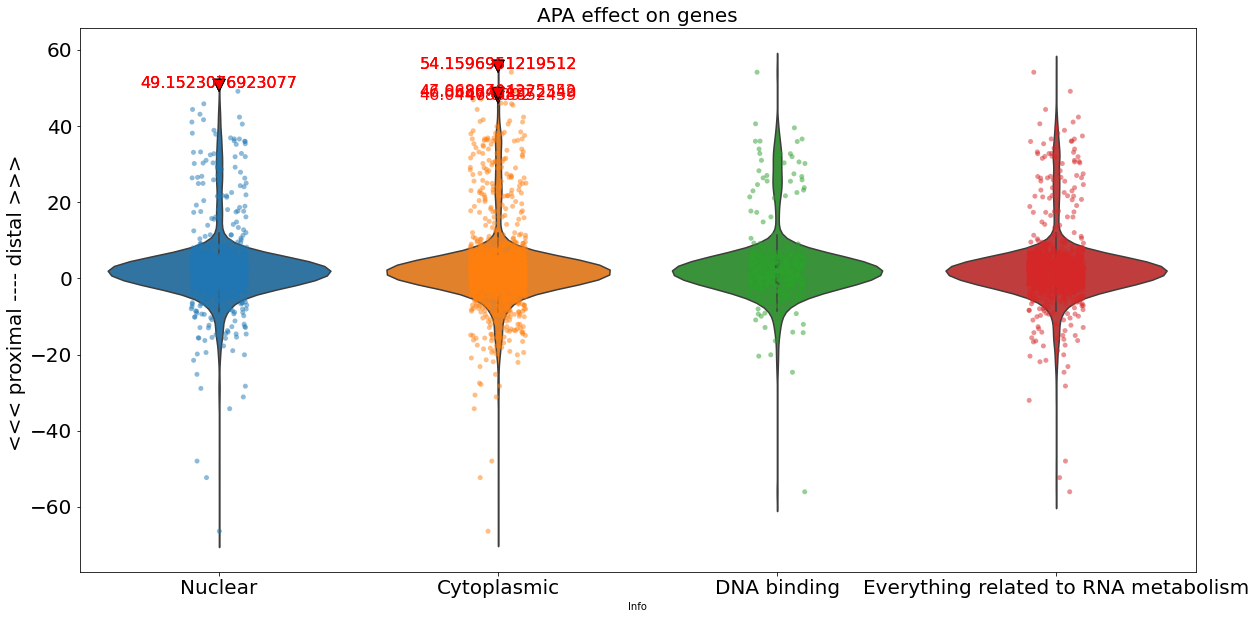

In [37]:
import numpy as np

# Get the y-coordinate of the top 5 points
top_points_y = np.sort(genes_GP_apa_df['APA_effect'])[-10:]

# Create a list of x-coordinates for each of the top points
top_points_x = []
for y in top_points_y:
    x = genes_GP_apa_df.loc[genes_GP_apa_df['APA_effect'] == y, 'Info'].values[0]
    top_points_x.append(x)

x_dict = {'Nuclear': 0, 'Cytoplasmic': 1, 'DNA binding': 2,  'Everything related to RNA metabolism': 3}

# Convert the list of x-coordinates to a list of integers
top_points_x = [x_dict[x] for x in top_points_x]

plt.figure(figsize=(20,10))
# in the violin plot show the outliers
sns.violinplot(x=genes_GP_apa_df['Info'], y=genes_GP_apa_df['APA_effect'], showfliers=True)
# sns.stripplot(x=genes_GP_apa_df['Info'], y=genes_GP_apa_df['APA_effect'], jitter=True, size=10)
# for stripplot only show the points that are outliers
sns.stripplot(x=genes_GP_apa_df['Info'], y=genes_GP_apa_df['APA_effect'], jitter=True, size=5, alpha=0.5)
# Add annotations for each of the top points
for i in range(len(top_points_x)):
    plt.annotate(str(top_points_y[i]), xy=(top_points_x[i], top_points_y[i]), 
                 xytext=(top_points_x[i], top_points_y[i] + 0.1), 
                 ha='center', va='bottom', fontsize=16, color='red',
                 arrowprops=dict(facecolor='red', shrink=0.05))

plt.ylabel('<<< proximal ---- distal >>> ', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('APA effect on genes', fontsize=20)
plt.show()



In [5]:
# for each Info group get the top 20 genes: abs(APA_effect) > 20
top_genes = genes_GP_apa_df.groupby('term_name').apply(lambda x: x.loc[abs(x['APA_effect']) > 5, :])
top_genes

term_name  \
term_name                                                                                   
DNA-binding transcription factor activity 854   DNA-binding transcription factor activity   
                                          871   DNA-binding transcription factor activity   
                                          876   DNA-binding transcription factor activity   
                                          881   DNA-binding transcription factor activity   
                                          882   DNA-binding transcription factor activity   
...                                                                                   ...   
transcription by RNA polymerase II        1728         transcription by RNA polymerase II   
                                          1730         transcription by RNA polymerase II   
                                          1735         transcription by RNA polymerase II   
                                          1736         transcription by RNA polymerase II   
                                          1737         transcription by RNA polymerase II   

                                                  genes  APA_effect  
term_name                                                            
DNA-binding transcription factor activity 854    ZNF341    5.567732  
                                          871      CUX1    5.062544  
                                          876      KLF9   -5.196094  
                                          881     TEAD3   -6.417661  
                                          882    ZNF530    6.232660  
...                                                 ...         ...  
transcription by RNA polymerase II        1728    BRIP1    8.087201  
                                          1730     SIX6   -9.037292  
                                          1735  HTATSF1    5.969412  
                                          1736      PIR    9.559333  
                                          1737    HIPK2    6.738913  

[432 rows x 3 columns]

In [95]:
# lets make y axis dictionary for position of the genes
y_dict = {j: i for i, j in enumerate(set(genes_GP_apa_df.term_name))}
y_dict

{'RNA biosynthetic process': 0,
 'cytoplasm': 1,
 'RNA polymerase II transcription regulatory region sequence-specific DNA binding': 2,
 'nuclear lumen': 3,
 'DNA-binding transcription factor activity, RNA polymerase II-specific': 4,
 'regulation of transcription by RNA polymerase II': 5,
 'DNA-binding transcription factor activity': 6,
 'regulation of RNA metabolic process': 7,
 'transcription by RNA polymerase II': 8,
 'regulation of RNA biosynthetic process': 9}

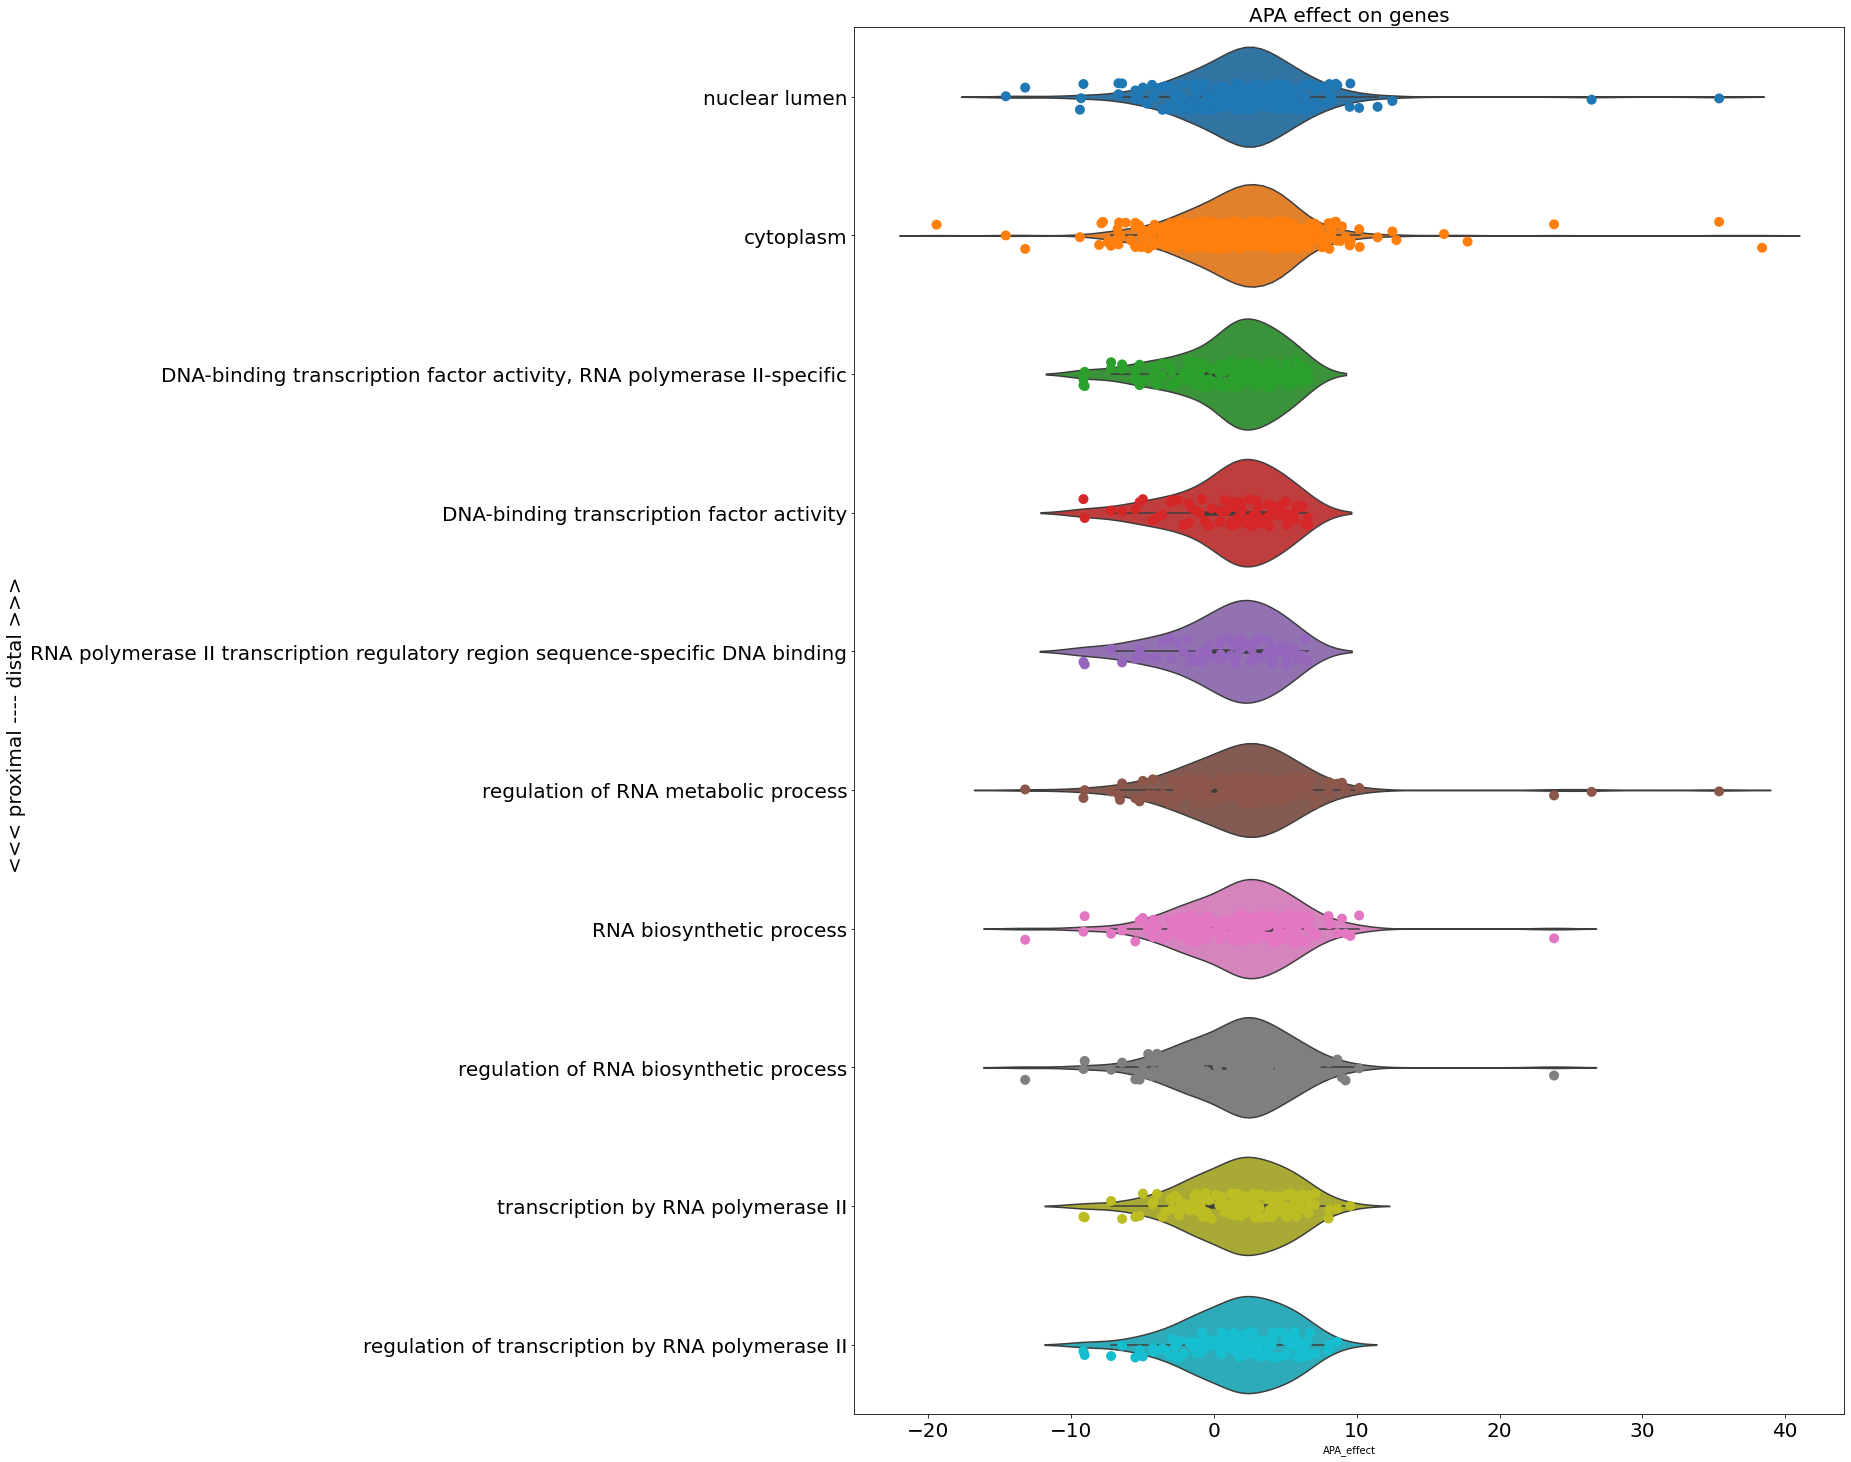

In [82]:
plt.figure(figsize=(20,20))
# in the violin plot show the outliers
sns.violinplot(x=genes_GP_apa_df['APA_effect'], y=genes_GP_apa_df['term_name'], orient='h', showfliers=True)
# sns.stripplot(x=genes_GP_apa_df['Info'], y=genes_GP_apa_df['APA_effect'], jitter=True, size=10)
# for stripplot only show the points that are outliers
sns.stripplot(x=genes_GP_apa_df['APA_effect'], y=genes_GP_apa_df['term_name'],orient='h', jitter=True, size=10,)
# Add annotations for each of the top points for each term_name group
# use the y_dict to get the y coordinate of the term_name

plt.tight_layout()
plt.ylabel('<<< proximal ---- distal >>> ', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('APA effect on genes', fontsize=20)
plt.show()

In [100]:

y_dict = {'nuclear lumen': 0,
'cytoplasm': 1,
'DNA-binding transcription factor activity, RNA polymerase II-specific': 2,
'DNA-binding transcription factor activity': 3,
'RNA polymerase II transcription regulatory region sequence-specific DNA binding': 4,
 'regulation of RNA metabolic process': 5,
'RNA biosynthetic process': 6,
 'regulation of RNA biosynthetic process': 7,
 'transcription by RNA polymerase II': 8,
 'regulation of transcription by RNA polymerase II': 9}


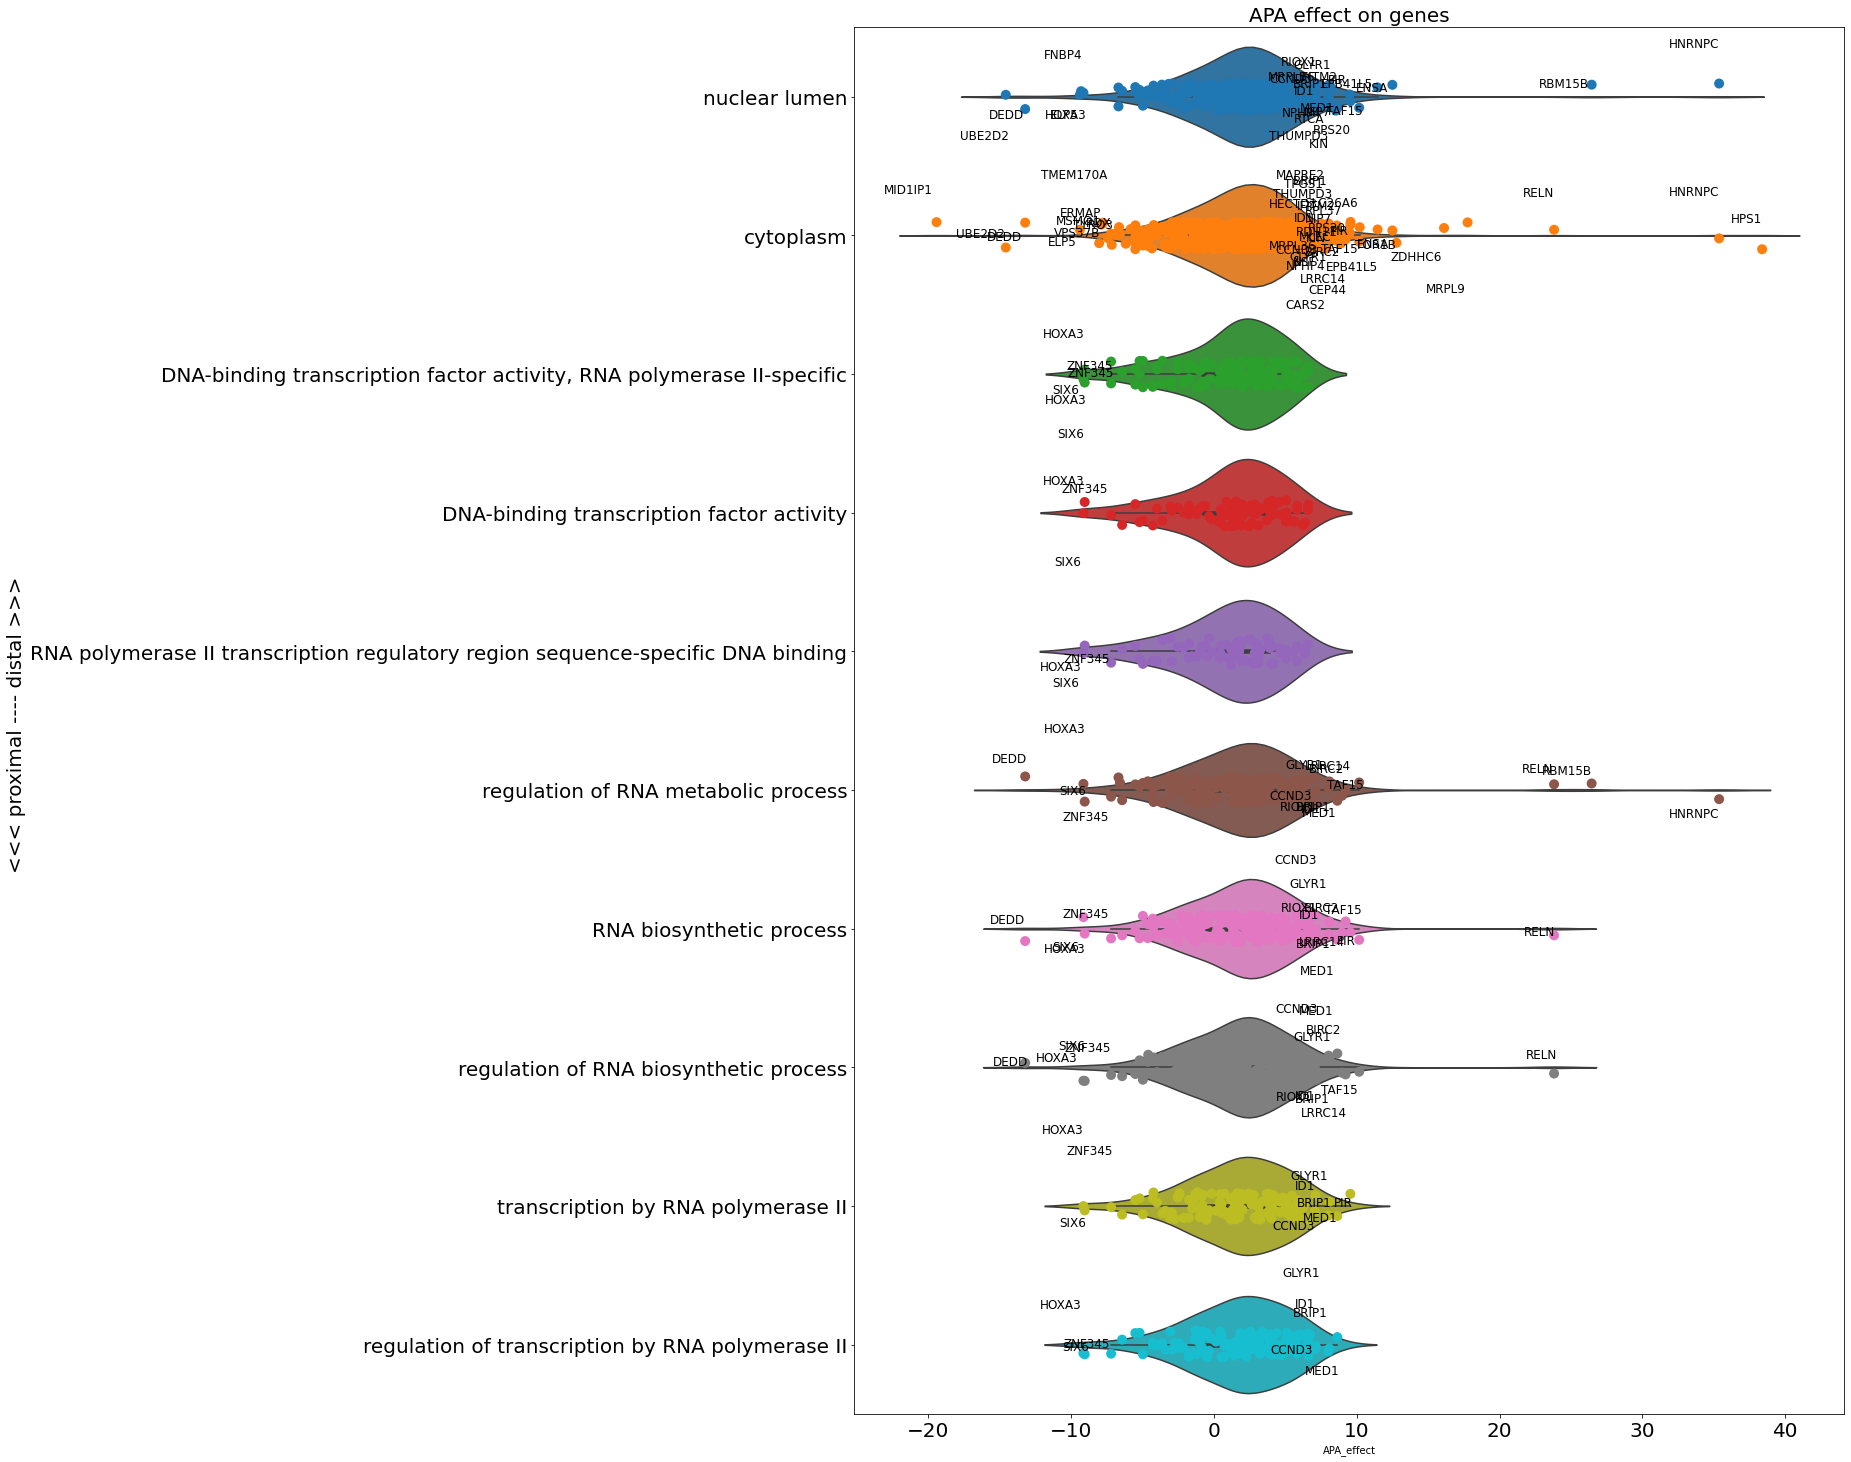

In [108]:
plt.figure(figsize=(20,20))
# in the violin plot show the outliers
sns.violinplot(x=genes_GP_apa_df['APA_effect'], y=genes_GP_apa_df['term_name'], orient='h', showfliers=True)
# sns.stripplot(x=genes_GP_apa_df['Info'], y=genes_GP_apa_df['APA_effect'], jitter=True, size=10)
# for stripplot only show the points that are outliers
sns.stripplot(x=genes_GP_apa_df['APA_effect'], y=genes_GP_apa_df['term_name'],orient='h', jitter=True, size=10,)
# Add annotations for each of the top points for each term_name group
# use the y_dict to get the y coordinate of the term_name
for i in range(len(top_genes)):
    x = top_genes.iloc[i]['APA_effect']
    y = y_dict[top_genes.iloc[i]['term_name']]
    x_jitter = np.random.normal(loc=0, scale=0.2) 
    y_jitter = np.random.normal(loc=0, scale=0.2)
    plt.annotate(top_genes.iloc[i]['genes'], xy=(x, y), 
                 xytext=(x + x_jitter , y + y_jitter), 
                 ha='right', fontsize=12)

plt.tight_layout()
plt.ylabel('<<< proximal ---- distal >>> ', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('APA effect on genes', fontsize=20)
plt.show()

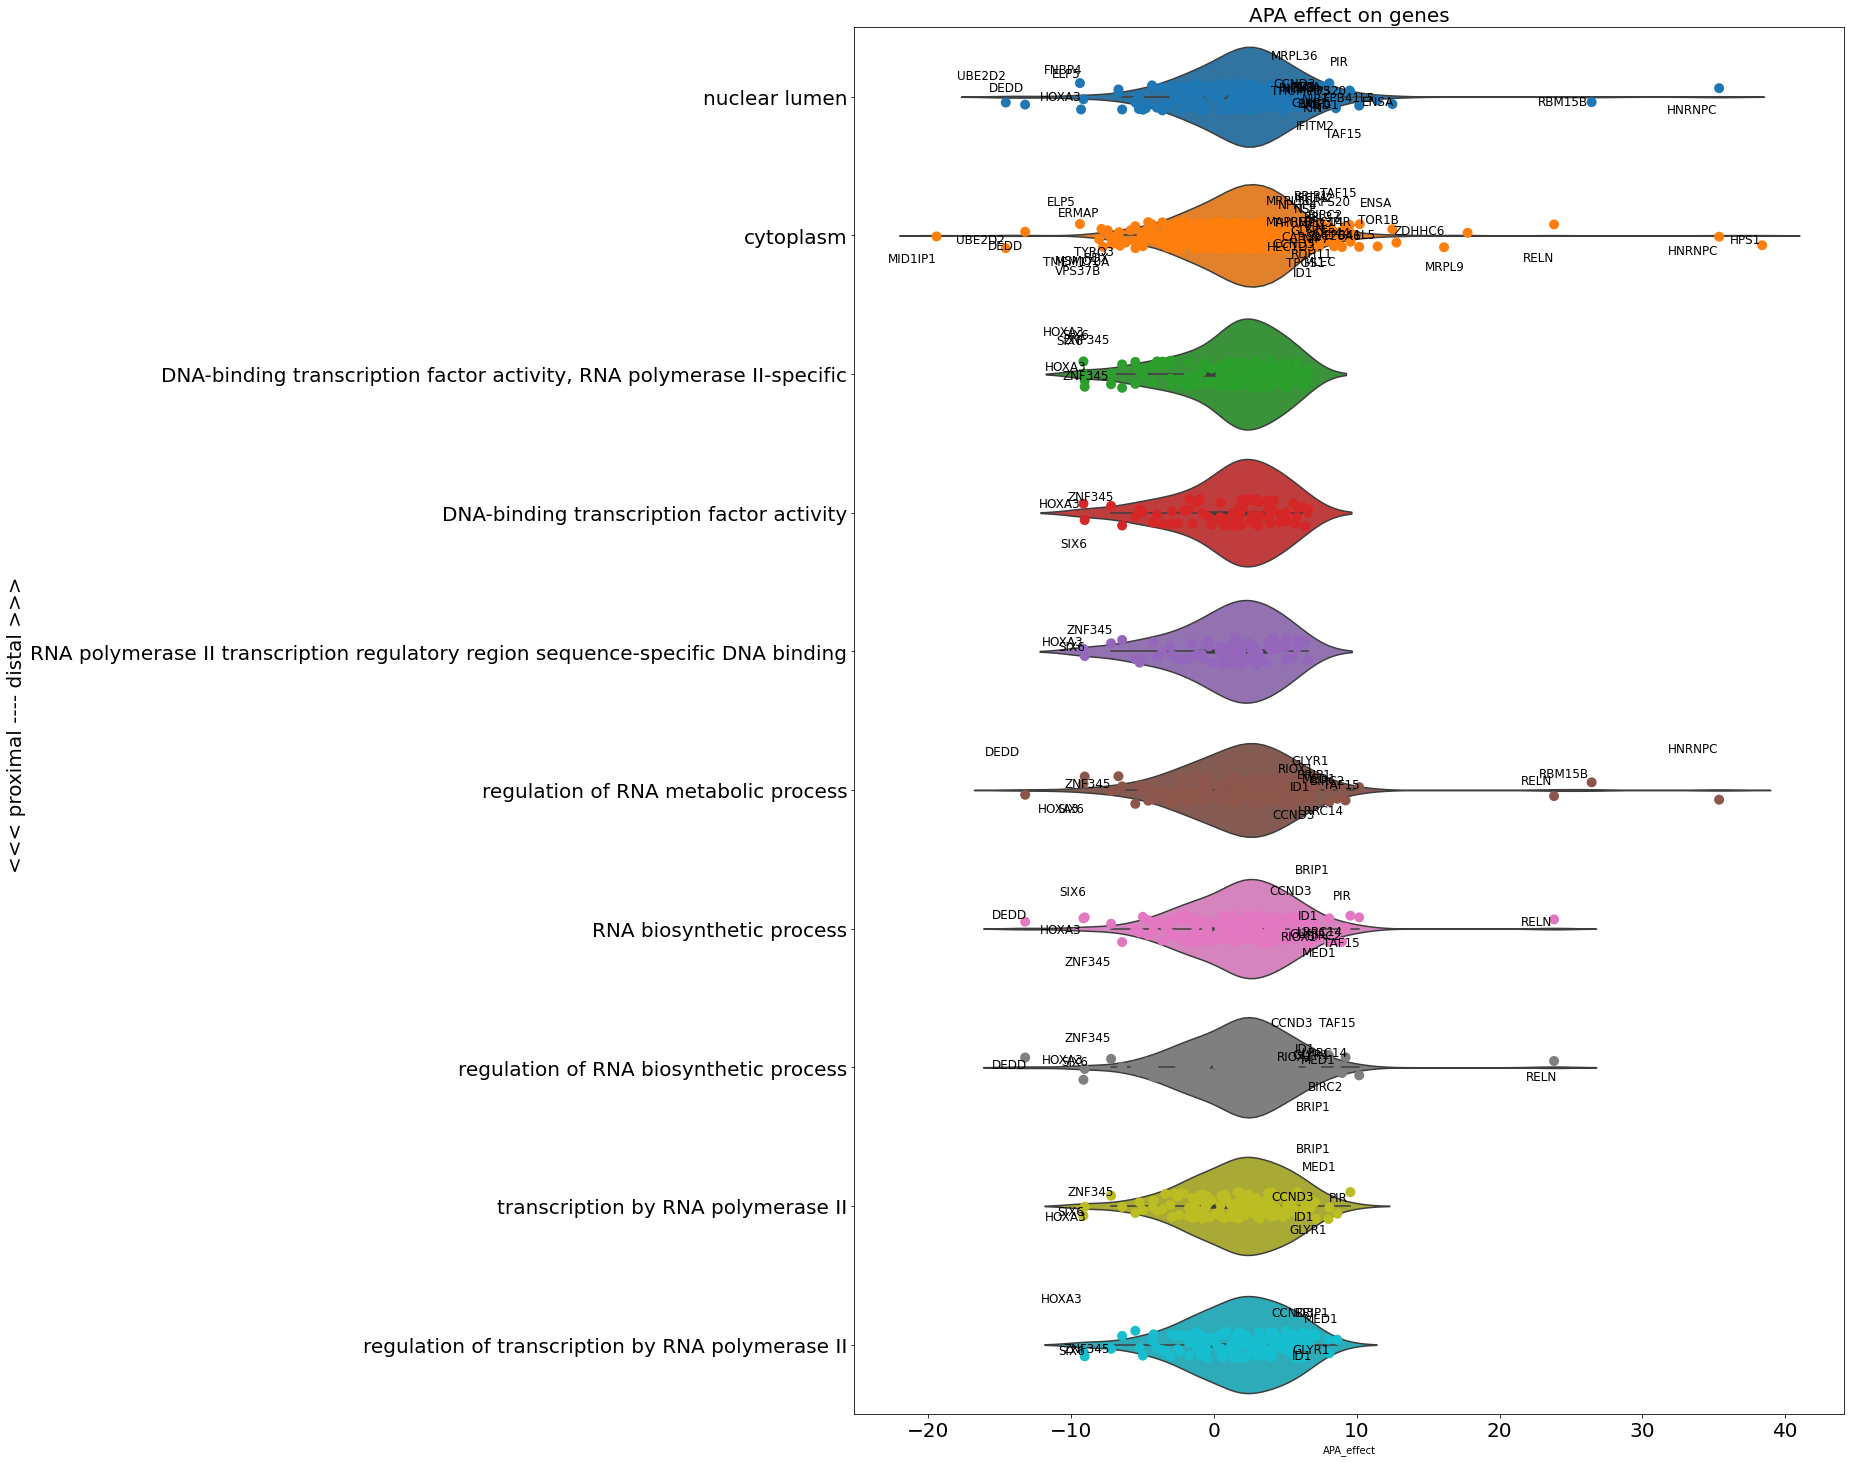

In [111]:
plt.figure(figsize=(20, 20))
# in the violin plot show the outliers
sns.violinplot(x=genes_GP_apa_df['APA_effect'], y=genes_GP_apa_df['term_name'], orient='h', showfliers=True)
# for stripplot only show the points that are outliers
sns.stripplot(x=genes_GP_apa_df['APA_effect'], y=genes_GP_apa_df['term_name'], orient='h', jitter=True, size=10)

# Add annotations for each of the top points for each term_name group
# use the y_dict to get the y coordinate of the term_name
for i in range(len(top_genes)):
    x = top_genes.iloc[i]['APA_effect']
    y = y_dict[top_genes.iloc[i]['term_name']]
    gene_name = top_genes.iloc[i]['genes']
    x_jitter = np.random.normal(loc=0, scale=0.15)
    y_jitter = np.random.normal(loc=0, scale=0.15)

    # calculate minimum distance between the new annotation and previous annotations
    min_distance = 1
    for annotation in plt.gca().texts:
        distance = np.sqrt((x - annotation._x)**2 + (y - annotation._y)**2)
        min_distance = min(min_distance, distance)

    # move the annotation to a new position if it is too close to previous annotations
    if min_distance < 0.2:
        angle = np.random.uniform(low=0, high=2*np.pi)
        x_new = x + min_distance*np.cos(angle)
        y_new = y + min_distance*np.sin(angle)
        plt.annotate(gene_name, xy=(x_new, y_new),
                     xytext=(x_new + x_jitter, y_new + y_jitter),
                     ha='right', fontsize=12)
    else:
        plt.annotate(gene_name, xy=(x, y),
                     xytext=(x + x_jitter, y + y_jitter),
                     ha='right', fontsize=12)

plt.tight_layout()
plt.ylabel('<<< proximal ---- distal >>> ', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('APA effect on genes', fontsize=20)
plt.show()


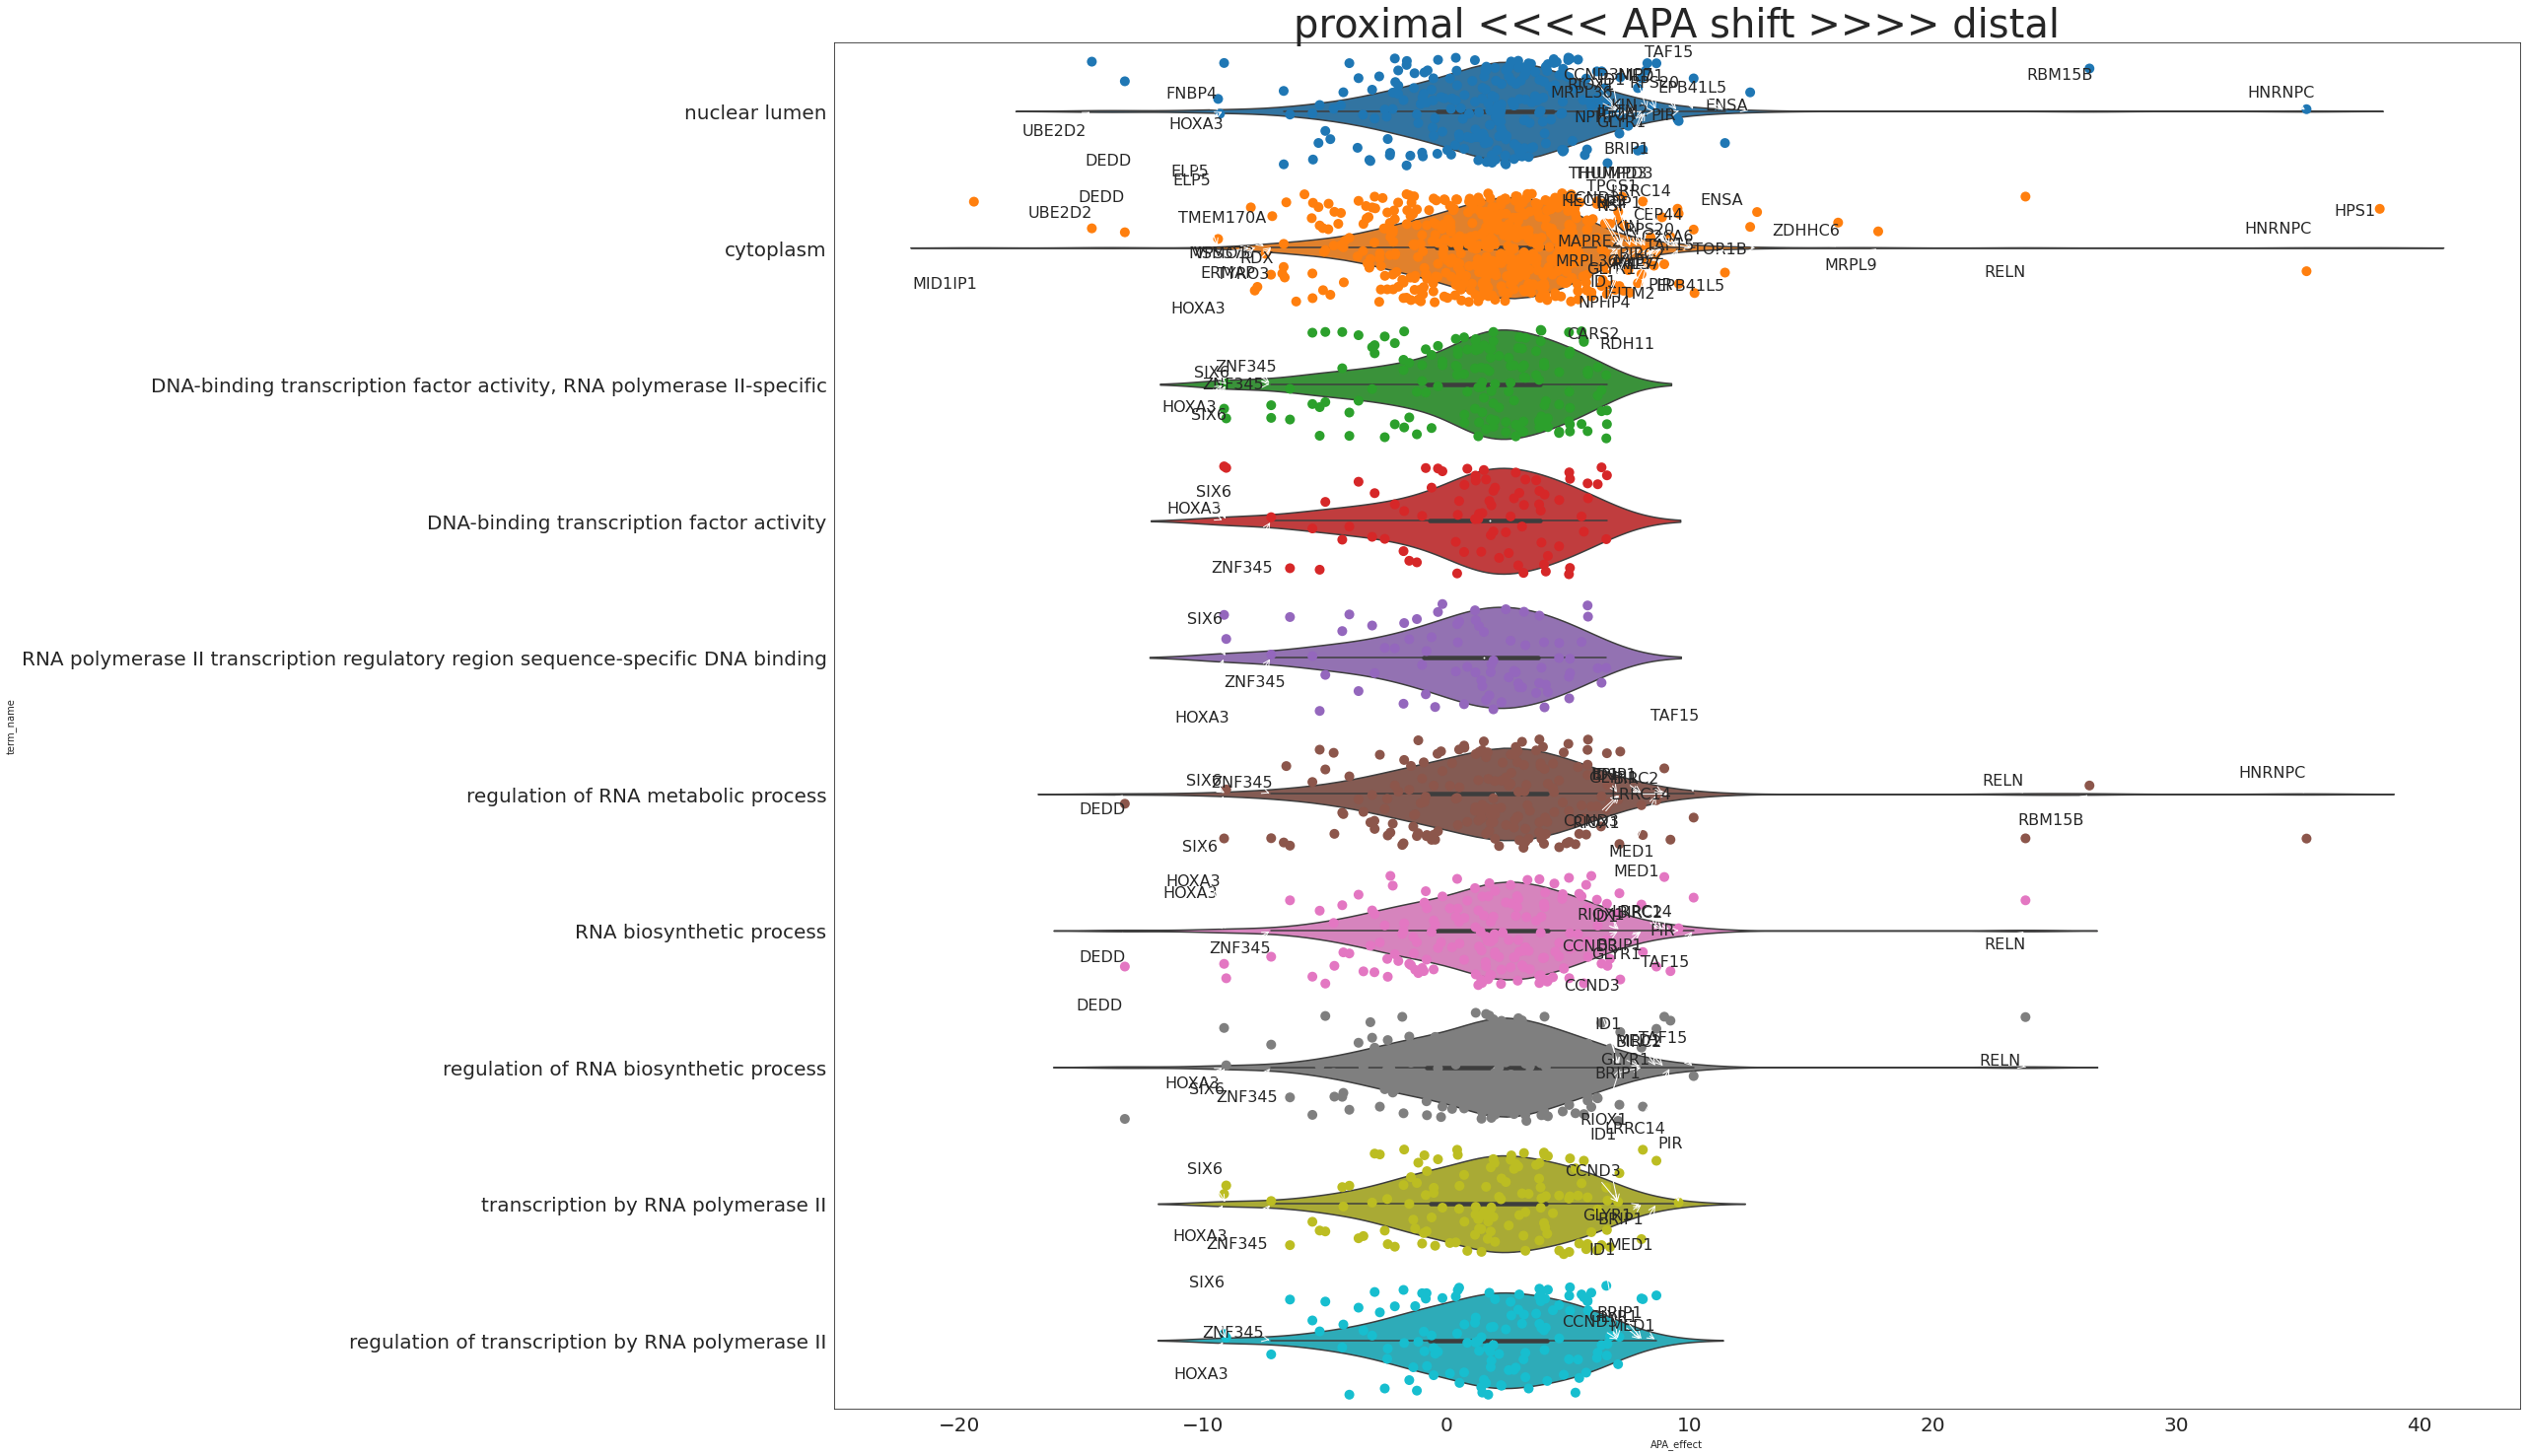

In [120]:
plt.figure(figsize=(30,20))
# white background
# reset the backgroud, lets have good looking background
sns.set_style("white")
# in the violin plot show the outliers
sns.violinplot(x=genes_GP_apa_df['APA_effect'], y=genes_GP_apa_df['term_name'], orient='h', showfliers=True)
# sns.stripplot(x=genes_GP_apa_df['Info'], y=genes_GP_apa_df['APA_effect'], jitter=True, size=10)
# for stripplot only show the points that are outliers
sns.stripplot(x=genes_GP_apa_df['APA_effect'], y=genes_GP_apa_df['term_name'],orient='h', jitter=0.4, size=10,)
# Add annotations for each of the top points for each term_name group
# use the y_dict to get the y coordinate of the term_name
for i in range(len(top_genes)):
    x = top_genes.iloc[i]['APA_effect']
    y = y_dict[top_genes.iloc[i]['term_name']]
    x_jitter = np.random.normal(loc=0, scale=0.2) 
    y_jitter = np.random.normal(loc=0, scale=0.25)
    plt.annotate(top_genes.iloc[i]['genes'], xy=(x, y), 
                 xytext=(x + x_jitter , y + y_jitter), 
                 ha='right', fontsize=16, arrowprops=dict(facecolor='red', arrowstyle="->"))

plt.tight_layout()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('proximal <<<< APA shift >>>> distal', fontsize=40)
plt.savefig('APA_effect_on_genes.pdf', format='pdf', dpi=1000)
plt.show()
# save pdf


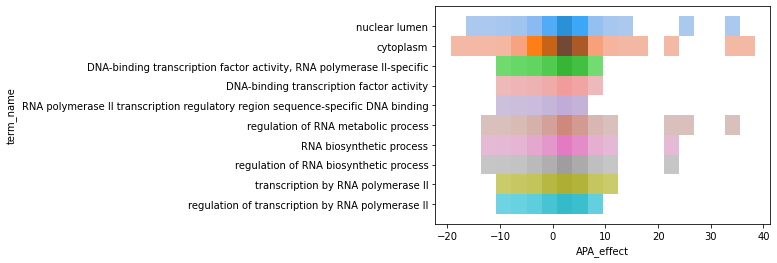

In [12]:
import seaborn as sns
hstplot = sns.histplot( x=genes_GP_apa_df['APA_effect'], y=genes_GP_apa_df['term_name'], bins=20, hue=genes_GP_apa_df['term_name'], legend=False)

In [27]:
import plotly.express as px
import pandas as pd

# Load your data into a pandas DataFrame


# Create a scatter plot with plotly
fig = px.scatter(genes_GP_apa_df, x="APA_effect", y="term_name", color="term_name", hover_name="genes",
                 size_max=10, opacity=0.7)

# Add annotations for a certain threshold
threshold = 4
annotations = []
for group in genes_GP_apa_df.groupby("term_name"):
    subset = group[1]
    subset = subset[abs(subset["APA_effect"]) >= threshold]
    if not subset.empty:
        for i in range(len(subset)):
            annotations.append(dict(
                x=subset.iloc[i]["APA_effect"],
                y=group[0],
                text=subset.iloc[i]["genes"],
                showarrow=False,
                font=dict(size=7),
                yshift=10
            ))

# Customize the plot
fig.update_layout(
    title="APA Effect vs. Gene Ontology",
    xaxis_title="APA Effect",
    yaxis_title="Gene Ontology",
    hovermode="closest",
    showlegend=False,
    annotations=annotations
)

# Show the plot
fig.show()


In [15]:
genes_GP_apa_df

term_name     genes  APA_effect
1                                        nuclear lumen    SPECC1   -3.416269
2                                        nuclear lumen   RPS6KA1    5.813447
3                                        nuclear lumen      CLK3    2.457411
4                                        nuclear lumen      DEDD  -13.204945
5                                        nuclear lumen    INTS13    1.644397
...                                                ...       ...         ...
1860  regulation of transcription by RNA polymerase II     TFCP2    2.965476
1861  regulation of transcription by RNA polymerase II      PDX1    0.454629
1862  regulation of transcription by RNA polymerase II  PPP1R12A   -4.222552
1863  regulation of transcription by RNA polymerase II   HTATSF1    5.969412
1864  regulation of transcription by RNA polymerase II     HIPK2    6.738913

[1864 rows x 3 columns]

In [29]:
import plotly.express as px
import pandas as pd


# Create a grouped histogram with plotly
fig = px.histogram(genes_GP_apa_df, x="APA_effect", color="term_name", nbins=20, barmode="group",
                   opacity=0.7, hover_data={"genes": True}, marginal="rug")

# Adjust the spacing between bars
fig.update_layout(bargap=0.1)

# Add a vertical line at a certain threshold
threshold = 0.5
fig.add_vline(x=threshold, line_width=2, line_dash="dash", line_color="gray")

# Show the plot
fig.show()


In [38]:
import plotly.express as px
import pandas as pd


# Create a grouped histogram with plotly
fig = px.histogram(genes_GP_apa_df, x="APA_effect", color="term_name", nbins=50, barmode="group",
                   opacity=0.7, hover_data={"genes": True}, marginal="rug")

# Adjust the spacing between bars
fig.update_layout(bargap=0.1)

# Add a vertical line at a certain threshold
threshold = 0.5
fig.add_vline(x=threshold, line_width=2, line_dash="dash", line_color="gray")

# Show the plot
fig.show()


In [39]:
genes_GP_apa_df

term_name     genes  APA_effect
1                                        nuclear lumen    SPECC1   -3.416269
2                                        nuclear lumen   RPS6KA1    5.813447
3                                        nuclear lumen      CLK3    2.457411
4                                        nuclear lumen      DEDD  -13.204945
5                                        nuclear lumen    INTS13    1.644397
...                                                ...       ...         ...
1860  regulation of transcription by RNA polymerase II     TFCP2    2.965476
1861  regulation of transcription by RNA polymerase II      PDX1    0.454629
1862  regulation of transcription by RNA polymerase II  PPP1R12A   -4.222552
1863  regulation of transcription by RNA polymerase II   HTATSF1    5.969412
1864  regulation of transcription by RNA polymerase II     HIPK2    6.738913

[1864 rows x 3 columns]

In [40]:
genes_pas_filtered

{'CD8B':         npas    pval    RLDu   RLDi    REDu  REDu.pval   REDi  REDi.pval  \
 gene                                                                       
 ALDOA      2  0.7450 -0.2030    NaN  -0.992   0.116000    NaN        NaN   
 ANP32B     4  0.0387 -0.8290  0.632  -2.450   0.000117  2.020    0.01880   
 BLVRB      3  0.2830 -2.9400 -0.896  -3.560   0.008760 -3.840    0.01370   
 BTF3       4  0.0066  0.0266 -1.250   2.650   0.000770 -0.186    0.69900   
 CALR       3  0.6300 -0.0704  0.368  -0.920   0.126000  1.150    0.10400   
 ...      ...     ...     ...    ...     ...        ...    ...        ...   
 TPT1       4  0.0140 -1.2200  0.394  -2.350   0.000172  1.260    0.00249   
 UBA52      4  0.2580 -1.2600 -1.020  -0.985   0.272000 -1.600    0.07360   
 UBAC1      2  0.9800     NaN  0.125     NaN        NaN  0.125    1.00000   
 UQCR11     3  0.0485 -8.0600    NaN -56.500   0.719000    NaN        NaN   
 YBX1       3  0.6310 -0.2270 -0.244  -0.370   0.242000 -0.427    0.

In [46]:
# for gene in genes_GP_apa_df lets get shape of the genes_pas_filtered[gene] and add it to a column

def get_affected_genes_num(gene):
    global genes_pas_filtered
    return genes_pas_filtered[gene].shape[0]

genes_GP_apa_df['affected_genes_num'] = genes_GP_apa_df.genes.apply(get_affected_genes_num)

In [47]:
import plotly.express as px
import pandas as pd


# Create a grouped histogram with plotly
fig = px.histogram(genes_GP_apa_df, x="APA_effect", color="term_name", nbins=50, barmode="group",
                   opacity=0.7, hover_data={"genes": True, 'affected_genes_num': True }, marginal="rug")

# Adjust the spacing between bars
fig.update_layout(bargap=0.1)

# Add a vertical line at a certain threshold
threshold = 0.5
fig.add_vline(x=threshold, line_width=2, line_dash="dash", line_color="gray")

# Show the plot
fig.show()


In [52]:
import plotly.express as px
import pandas as pd


# Create a grouped histogram with plotly
fig = px.histogram(genes_GP_apa_df, x="APA_effect", color="term_name", nbins=50, barmode="group",
                   opacity=0.7, hover_data={"genes": True, 'affected_genes_num': True }, marginal="rug")

# Adjust the spacing between bars
fig.update_layout(bargap=0.1)

# Add a vertical line at a certain threshold
threshold = 0.5
fig.add_vline(x=threshold, line_width=2, line_dash="dash", line_color="gray")

# Show the plot
fig.show()


In [53]:
genes_GP_apa_df[genes=='PPP2BC']

NameError: name 'genes' is not defined